### Batch Number : AD-02

### Title: Score Insight Prediction

### P.Bhavana - 2111CS010090
### U.Aditya Sai - 2111CS010019
### V.Arogya Saketh - 2111CS010062
### K.Ashwanth Sai - 2111CS010074


In [1]:
# Import libraries
import os
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)



In [2]:
path = os.getcwd()
file = path + "\creditscore.csv"


file


'C:\\Users\\Bhavana padisetty\\DAP-3-2\\Desktop\\3-2AD\\creditscore.csv'

### 1. Load Dataset and get an overview¶

In [3]:
# Load credit score  Dataset
df = pd.read_csv(file)
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,0x5046,CUS_0xa2b2,January,Pedro Nicolaciz,53,753-72-2651,Manager,71305.22,5914.101667,8,4,18,0,NaN,12,18,8.49,3.0,_,1004.26,29.160753,22 Years and 10 Months,No,0.000000,229.3525703,High_spent_Medium_value_payments,612.0575964,Standard
9945,0x5047,CUS_0xa2b2,February,Pedro Nicolaciz,53,#F%$D@*&8,_______,71305.22,5914.101667,8,4,18,0,NaN,12,15,8.49,3.0,Standard,1004.26,29.253660,NaN,NM,0.000000,125.0469396,High_spent_Medium_value_payments,716.363227,Standard
9946,0x5048,CUS_0xa2b2,March,Pedro Nicolaciz,53,753-72-2651,Manager,71305.22_,5914.101667,8,4,18,0,NaN,12,15,8.49,3.0,_,1004.26,34.216340,23 Years and 0 Months,No,0.000000,140.578357,High_spent_Medium_value_payments,700.8318096,Standard
9947,0x5049,CUS_0xa2b2,April,Pedro Nicolaciz,53,753-72-2651,Manager,71305.22,5914.101667,8,4,18,0,NaN,15,15_,8.49,2372.0,Standard,1004.26,35.062271,23 Years and 1 Months,No,0.000000,270.2027932,Low_spent_Medium_value_payments,601.2073735,Standard


In [4]:
# displaying top 5 rows
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [5]:
# displaying last 5 rows
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
9944,0x5046,CUS_0xa2b2,January,Pedro Nicolaciz,53,753-72-2651,Manager,71305.22,5914.101667,8,4,18,0,NaN,12,18,8.49,3.0,_,1004.26,29.160753,22 Years and 10 Months,No,0.0,229.3525703,High_spent_Medium_value_payments,612.0575964,Standard
9945,0x5047,CUS_0xa2b2,February,Pedro Nicolaciz,53,#F%$D@*&8,_______,71305.22,5914.101667,8,4,18,0,NaN,12,15,8.49,3.0,Standard,1004.26,29.253660,NaN,NM,0.0,125.0469396,High_spent_Medium_value_payments,716.363227,Standard
9946,0x5048,CUS_0xa2b2,March,Pedro Nicolaciz,53,753-72-2651,Manager,71305.22_,5914.101667,8,4,18,0,NaN,12,15,8.49,3.0,_,1004.26,34.216340,23 Years and 0 Months,No,0.0,140.578357,High_spent_Medium_value_payments,700.8318096,Standard
9947,0x5049,CUS_0xa2b2,April,Pedro Nicolaciz,53,753-72-2651,Manager,71305.22,5914.101667,8,4,18,0,NaN,15,15_,8.49,2372.0,Standard,1004.26,35.062271,23 Years and 1 Months,No,0.0,270.2027932,Low_spent_Medium_value_payments,601.2073735,Standard
9948,0x504a,CUS_0xa2b2,May,NaN,53,#F%$D@*&8,Manager,71305.22_,5914.101667,8,4,18,0,NaN,11,15,1.49,5.0,Standard,1004.26,25.031974,23 Years and 2 Months,No,0.0,208.2886334,Low_spent_Small_value_payments,673.1215332,Poor


In [6]:
#Print Column names
df.columns



Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
df.shape

(9949, 28)

In [8]:
# Get Size of Dataset (Rows and Columns)
df.shape


(9949, 28)

In [9]:
# Get Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9949 entries, 0 to 9948
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        9949 non-null   object 
 1   Customer_ID               9949 non-null   object 
 2   Month                     9949 non-null   object 
 3   Name                      8967 non-null   object 
 4   Age                       9949 non-null   object 
 5   SSN                       9949 non-null   object 
 6   Occupation                9949 non-null   object 
 7   Annual_Income             9949 non-null   object 
 8   Monthly_Inhand_Salary     8486 non-null   float64
 9   Num_Bank_Accounts         9949 non-null   int64  
 10  Num_Credit_Card           9949 non-null   int64  
 11  Interest_Rate             9949 non-null   int64  
 12  Num_of_Loan               9949 non-null   object 
 13  Type_of_Loan              8768 non-null   object 
 14  Delay_fr

### Data Manipulation
### 2.Check for Null Values and Manipulate Data,if Null Values found
### Find Null Values-Summary¶

In [10]:
# To find the total no.of rows which are missing value in a column
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                         982
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       1463
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                1181
Delay_from_due_date            0
Num_of_Delayed_Payment       704
Changed_Credit_Limit           0
Num_Credit_Inquiries         207
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age           928
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      423
Payment_Behaviour              0
Monthly_Balance              134
Credit_Score                   0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,8486.0,4321.946459,3210.844892,355.208333,1684.474271,3269.991667,6155.640000,14836.73667
Num_Bank_Accounts,9949.0,17.646397,123.101988,0.000000,3.000000,6.000000,8.000000,1789.00000
Num_Credit_Card,9949.0,24.812946,140.200211,0.000000,4.000000,5.000000,7.000000,1486.00000
Interest_Rate,9949.0,74.738466,471.844866,1.000000,7.000000,14.000000,20.000000,5721.00000
Delay_from_due_date,9949.0,21.335813,14.633531,-5.000000,10.000000,18.000000,28.000000,67.00000
Num_Credit_Inquiries,9742.0,24.359269,175.496818,0.000000,3.000000,5.000000,9.000000,2592.00000
Credit_Utilization_Ratio,9949.0,32.290308,5.157206,20.172942,27.971484,32.276345,36.529238,50.00000
Total_EMI_per_month,9949.0,1402.767884,8227.851353,0.000000,28.452848,67.561844,166.411782,82204.00000


In [12]:
# finding the key statistical values of the categorical columns
df.describe(exclude=np.number).T

,count,unique,top,freq
ID,9949,9949,0x1602,1
Customer_ID,9949,1244,CUS_0xd40,8
Month,9949,8,January,1244
Name,8967,1220,Kevin Yaou,23
Age,9949,295,36,334
SSN,9949,1245,#F%$D@*&8,566
Occupation,9949,16,Lawyer,728
Annual_Income,9949,1893,19114.12,8
Num_of_Loan,9949,64,2,1563
Type_of_Loan,8768,809,Home Equity Loan,144


In [13]:
df.Month.value_counts()

January     1244
February    1244
March       1244
April       1244
May         1244
June        1243
July        1243
August      1243
Name: Month, dtype: int64

In [14]:
# finding the unique values for each column in the data to find unwanted values
# first creating a copy of the data that do not have missing values
df_without_na = df.dropna().copy()

# finding the unique values for each column
for i in df_without_na:
    print('\n', i, df_without_na[i].unique())





 ID ['0x1602' '0x1608' '0x160e' ... '0x503c' '0x503e' '0x503f']

 Customer_ID ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0x4390' 'CUS_0xc2ba'
 'CUS_0x29e9']

 Month ['January' 'July' 'February' 'March' 'May' 'June' 'August' 'April']

 Name ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Josephf' 'Willsf'
 'Mutikaniv']

 Age ['23' '28_' '28' '34' '54' '55' '33' '30' '24' '24_' '44' '45' '40' '32'
 '33_' '35' '35_' '36' '39' '37' '181' '30_' '31' '46' '41' '42' '48'
 '995' '38' '54_' '43' '21_' '21' '22' '37_' '16' '19' '20' '7080' '18'
 '-500' '15' '27' '26' '3052' '14' '17' '18_' '2111_' '46_' '47' '1032'
 '16_' '25' '456' '5717' '25_' '38_' '27_' '19_' '55_' '31_' '3169' '29'
 '43_' '48_' '49' '3115' '7657' '51' '6452' '34_' '22_' '1439' '50' '5795'
 '20_' '4872' '15_' '1383' '52' '51_' '8352' '3734' '53' '26_' '40_'
 '2056' '50_' '2339' '14_' '8406' '39_' '36_' '6953' '5626' '4471' '548'
 '53_' '44_' '5490' '525' '4202' '3665' '3616' '6619' '1808' '7992' '45_'
 '223' '6895' '4

In [15]:
import numpy as np

def preprocess_data(data, mvi_groupby=None, mvi_customval=None, column=None, unwanted_value_replace=None, unwanted_value_strip=None, datatype=None):
    # stripping unwanted values that might be at the beginning or end of the value
    if unwanted_value_strip is not None:
        if data[column].dtype == object:
            data[column] = data[column].str.strip(unwanted_value_strip)
            print(f"\nTrailing & leading {unwanted_value_strip} are removed")

    # replacing unwanted value with NaN
    if unwanted_value_replace is not None:
        data[column] = data[column].replace(unwanted_value_replace, np.nan)
        print(f"\nUnwanted value {unwanted_value_replace} is replaced with NaN")

    # performing missing value imputation (mvi) using mode after grouping data using the column specified by the user
    if mvi_groupby and column:
        data[column] = data[column].replace('', np.nan)
        group_mode = data.groupby(mvi_groupby)[column].transform(lambda x: x.mode().iat[0])
        data[column] = data[column].fillna(group_mode)
        print("\nMissing values imputed with group mode")

    # performing missing value imputation using a user provided custom value
    if mvi_customval is not None:
        data[column] = data[column].replace('', np.nan)
        data[column].replace([np.NaN], mvi_customval, inplace=True)
        print(f"\nMissing values are replaced with '{mvi_customval}'")

    # changing the data type of the column based on user provided data type
    if datatype is not None:
        data[column] = data[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")

    print('----------------------------------------------------')

# Example usage
# We start by performing MVI on the categorical columns.
print("Column: Name")
preprocess_data(data=df, column='Name', mvi_groupby='Customer_ID')

print("Column: Type_of_Loan")
preprocess_data(data=df, column='Type_of_Loan', mvi_customval='Not Specified')



Column: Name

Missing values imputed with group mode
----------------------------------------------------
Column: Type_of_Loan

Missing values are replaced with 'Not Specified'
----------------------------------------------------


In [16]:
print("Column: SSN")
preprocess_data(data = df,
column = 'SSN',
unwanted_value_replace = '#F%$D@*&8',
mvi_groupby = 'Customer_ID')
print("Column: Occupation")
preprocess_data(data = df,
column = 'Occupation',
unwanted_value_replace = '_______',
mvi_groupby = 'Customer_ID',)

print("Column: Credit_Mix")
preprocess_data(data = df,
column = 'Credit_Mix',
unwanted_value_replace = '_',
mvi_groupby = 'Customer_ID')

print("Column: Payment_Behaviour")
preprocess_data(data = df,
column = 'Payment_Behaviour',
unwanted_value_replace = '!@9#%8',
mvi_groupby = 'Customer_ID')

Column: SSN

Unwanted value #F%$D@*&8 is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------
Column: Occupation

Unwanted value _______ is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------
Column: Credit_Mix

Unwanted value _ is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------
Column: Payment_Behaviour

Unwanted value !@9#%8 is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------


In [17]:
print("Column: Monthly_Inhand_Salary")
preprocess_data(data = df,
column = 'Monthly_Inhand_Salary',
mvi_groupby = 'Customer_ID')

print("Column: Num_Credit_Inquiries")
preprocess_data(data = df,
column = 'Num_Credit_Inquiries',
mvi_groupby = 'Customer_ID')

Column: Monthly_Inhand_Salary

Missing values imputed with group mode
----------------------------------------------------
Column: Num_Credit_Inquiries

Missing values imputed with group mode
----------------------------------------------------


In [18]:
print("Column: Age")
preprocess_data(data = df,
column = 'Age',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'int')

print("Column: Annual_Income")
preprocess_data(data = df,
column = 'Annual_Income',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'float')

print("Column: Outstanding_Debt")
preprocess_data(data = df,
column = 'Outstanding_Debt',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'float')

print("Column: Amount_invested_monthly")
preprocess_data(data = df,
column = 'Amount_invested_monthly',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'float')

print("Column: Num_of_Loan")
preprocess_data(data = df,
column = 'Num_of_Loan',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'int')

print("Column: Num_of_Delayed_Payment")
preprocess_data(data = df,
column = 'Num_of_Delayed_Payment',
unwanted_value_strip = '_',
mvi_groupby = 'Customer_ID',
datatype = 'float')

Column: Age

Trailing & leading _ are removed

Missing values imputed with group mode

Datatype of Age is changed to int
----------------------------------------------------
Column: Annual_Income

Trailing & leading _ are removed

Missing values imputed with group mode

Datatype of Annual_Income is changed to float
----------------------------------------------------
Column: Outstanding_Debt

Trailing & leading _ are removed

Missing values imputed with group mode

Datatype of Outstanding_Debt is changed to float
----------------------------------------------------
Column: Amount_invested_monthly

Trailing & leading _ are removed

Missing values imputed with group mode

Datatype of Amount_invested_monthly is changed to float
----------------------------------------------------
Column: Num_of_Loan

Trailing & leading _ are removed

Missing values imputed with group mode

Datatype of Num_of_Loan is changed to int
----------------------------------------------------
Column: Num_of_Delayed

In [19]:
print("Column: Changed_Credit_Limit")
preprocess_data(data = df,
column = 'Changed_Credit_Limit',
unwanted_value_strip = '_',
unwanted_value_replace = '_',
mvi_groupby = 'Customer_ID',
datatype = 'float')
print("Column: Monthly_Balance")
preprocess_data(data = df,
column = 'Monthly_Balance',
unwanted_value_strip = '_',
unwanted_value_replace = '__-333333333333333333333333333__',
mvi_groupby = 'Customer_ID',
datatype = 'float')

Column: Changed_Credit_Limit

Trailing & leading _ are removed

Unwanted value _ is replaced with NaN

Missing values imputed with group mode

Datatype of Changed_Credit_Limit is changed to float
----------------------------------------------------
Column: Monthly_Balance

Trailing & leading _ are removed

Unwanted value __-333333333333333333333333333__ is replaced with NaN

Missing values imputed with group mode

Datatype of Monthly_Balance is changed to float
----------------------------------------------------


In [20]:
import pandas as pd

# creating a function that picks the year and month and then combines them to give the total number of months
def credit_history_in_months(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        months = int(val.split(' ')[3])
        return (years * 12) + months
    else:
        return val

# applying the function to the column
df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: credit_history_in_months(x)).astype(float)

print('Column: Credit_History_Age')
preprocess_data(data=df, column='Credit_History_Age', mvi_groupby='Customer_ID')


Column: Credit_History_Age

Missing values imputed with group mode
----------------------------------------------------


In [21]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def outlier_capping(data, threshold=1.5):
    # making a copy of the input DataFrame
    data_copy = data.copy()

    # creating an empty list to save the outlier indices
    outlier_indices = []

    # calculating quartile 1 and 3 for every numerical column in the data
    for column in data_copy.columns:
        if pd.api.types.is_numeric_dtype(data_copy[column]):
            # calculating quartiles
            Q1 = data_copy[column].quantile(0.25)
            Q3 = data_copy[column].quantile(0.75)

            # calculating inter-quartile range
            IQR = Q3 - Q1

            # defining the upper and lower outlier bounds
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR

            # identifying outliers
            outliers = data_copy[(data_copy[column] < lower_bound) | (data_copy[column] > upper_bound)]
            outlier_indices.extend(outliers.index)

            # capping outliers
            data_copy[column] = np.where(data_copy[column] < lower_bound, lower_bound, data_copy[column])
            data_copy[column] = np.where(data_copy[column] > upper_bound, upper_bound, data_copy[column])

    # removing duplicates from outlier_indices list
    outlier_indices = list(set(outlier_indices))

    # returning the dataframe with capped outliers and the outlier indices
    return data_copy, outlier_indices

# running the function to cap all the outliers in the data
df_clean, outliers = outlier_capping(df)



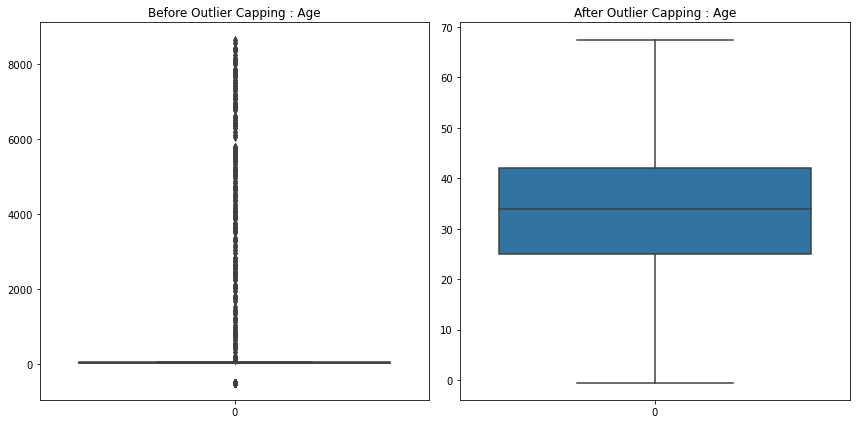

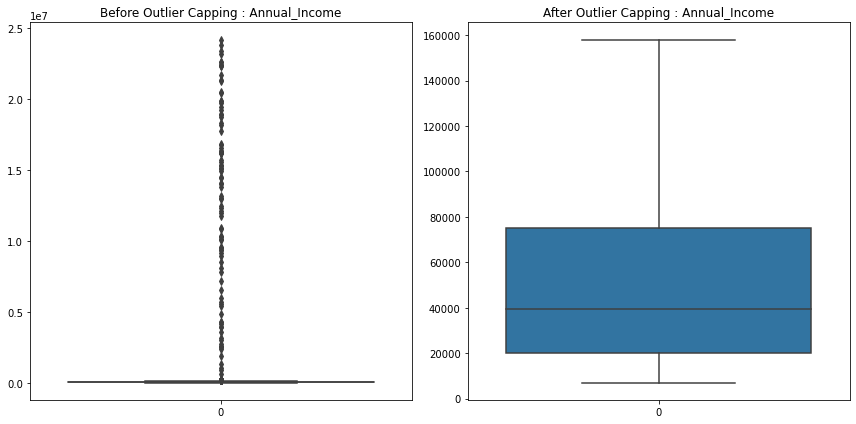

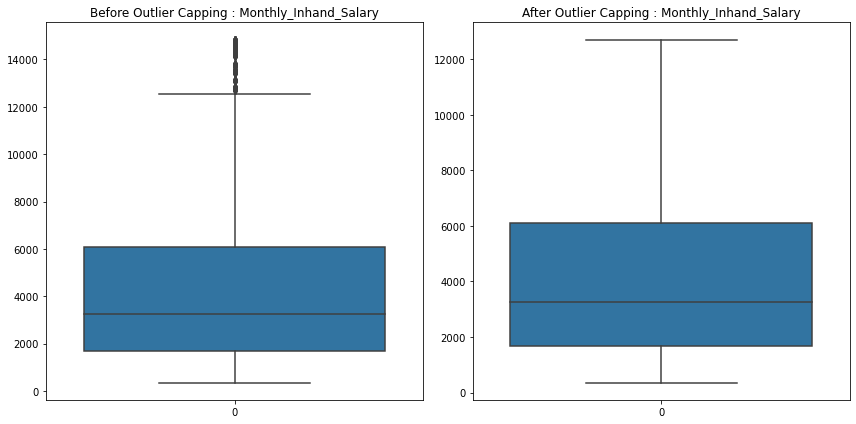

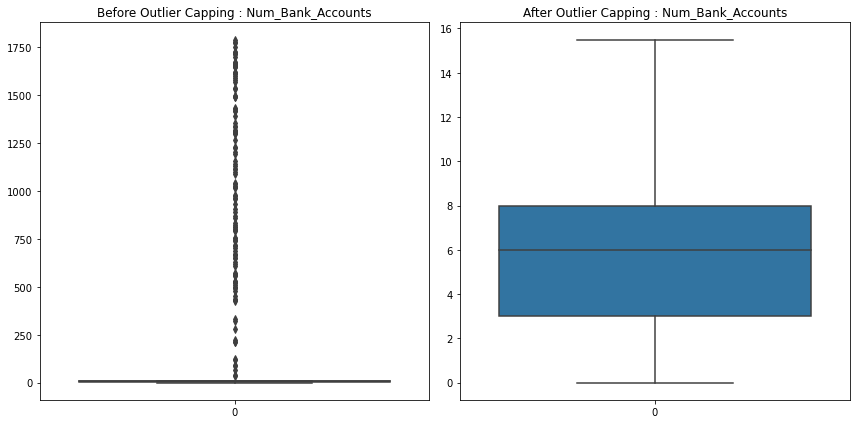

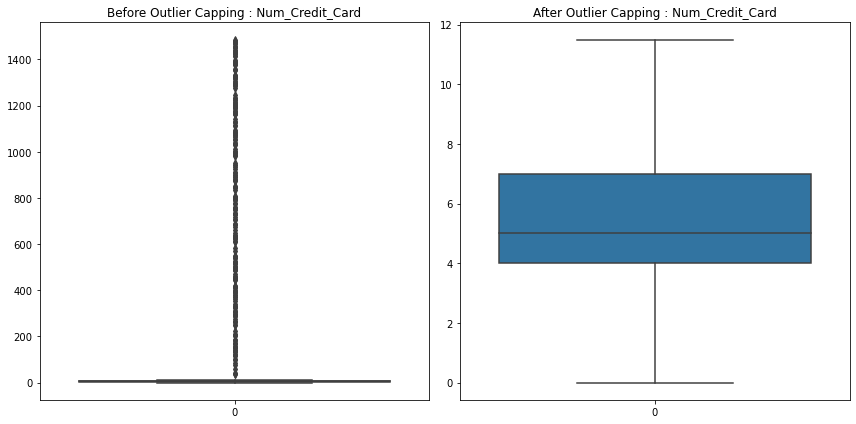

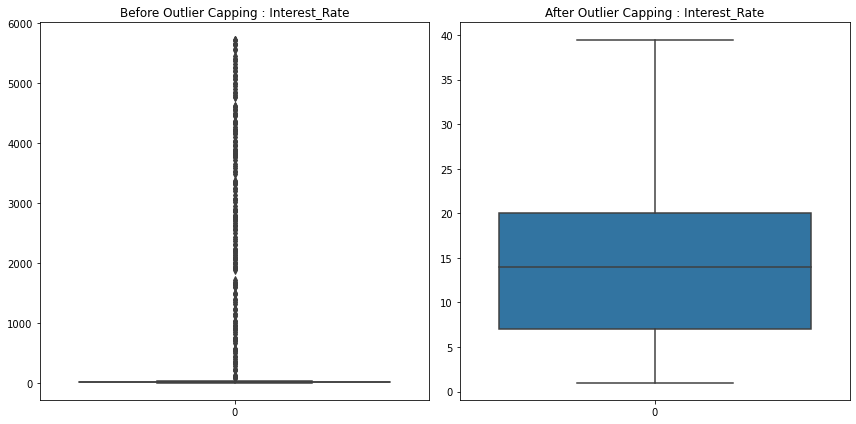

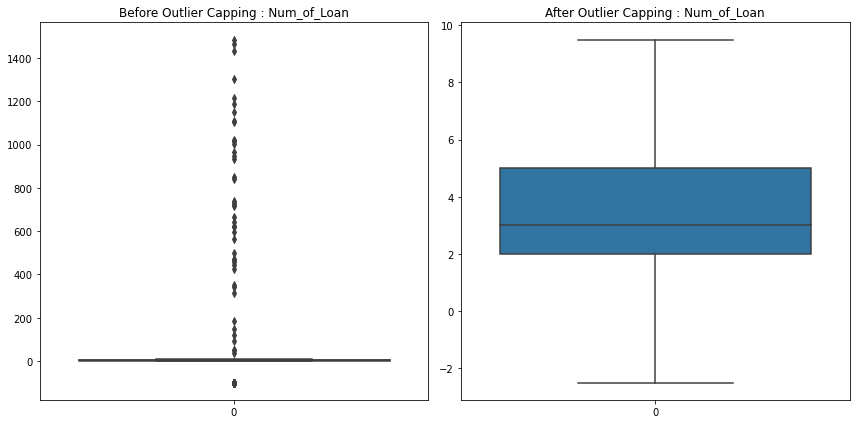

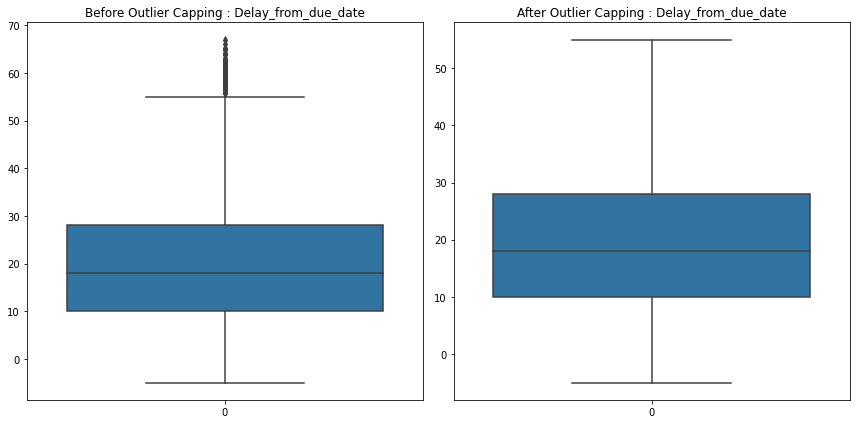

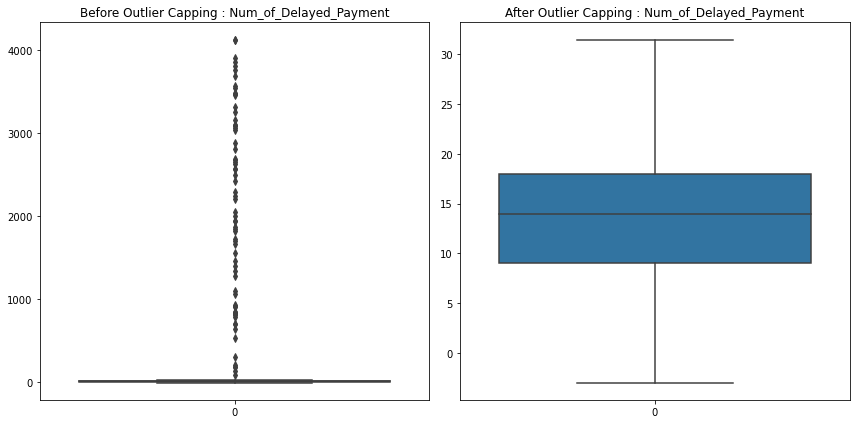

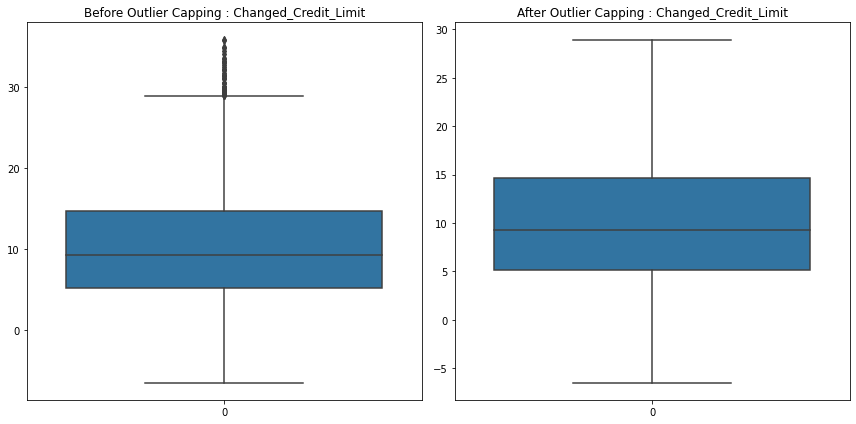

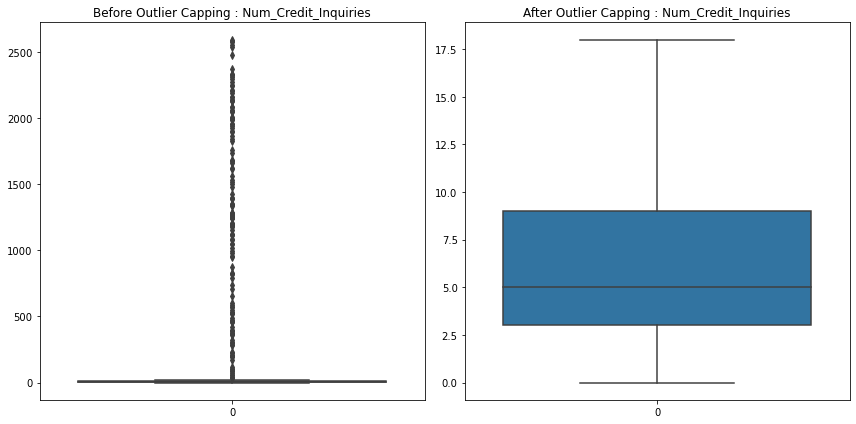

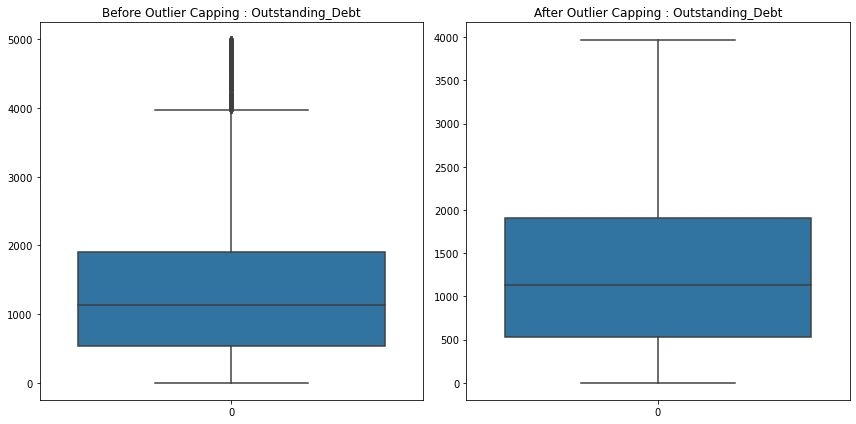

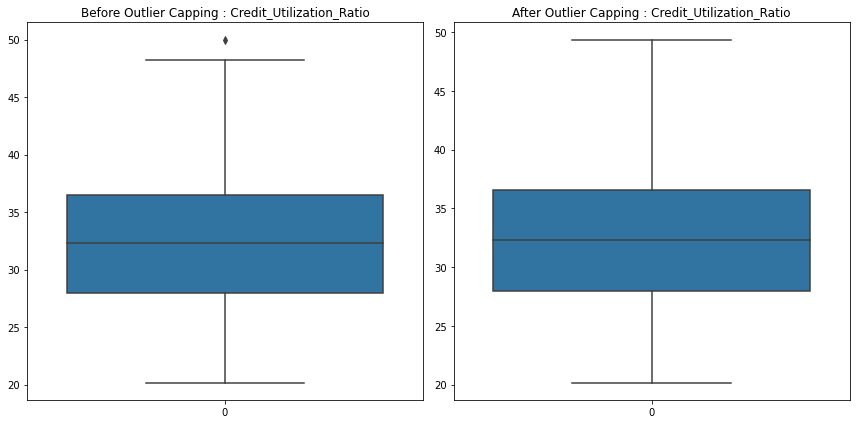

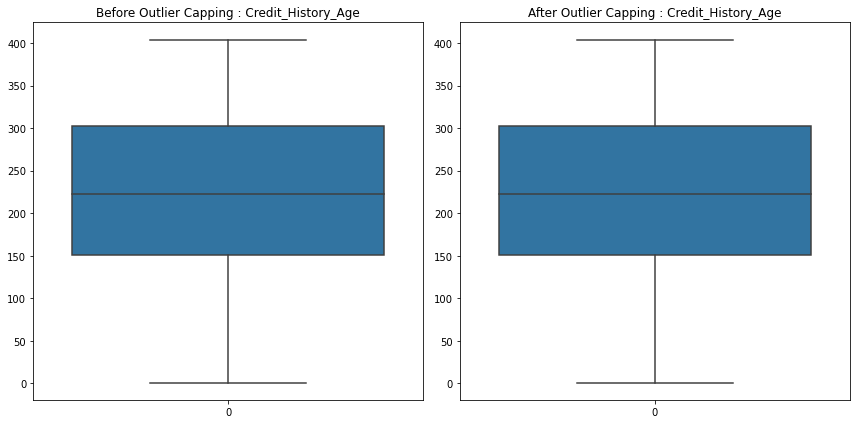

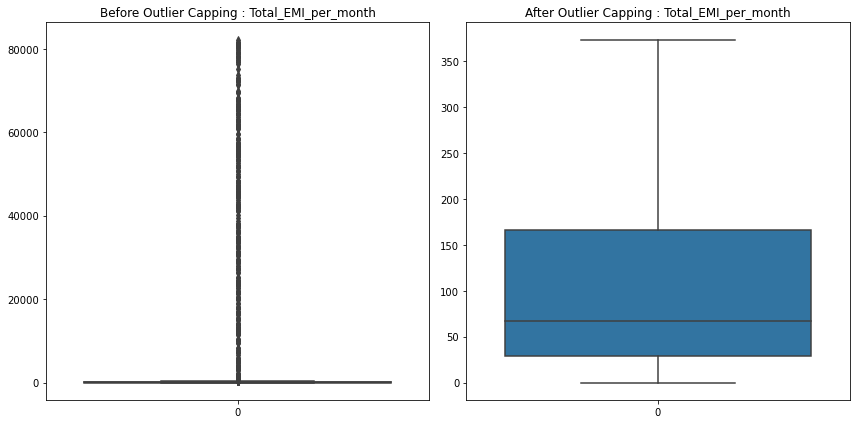

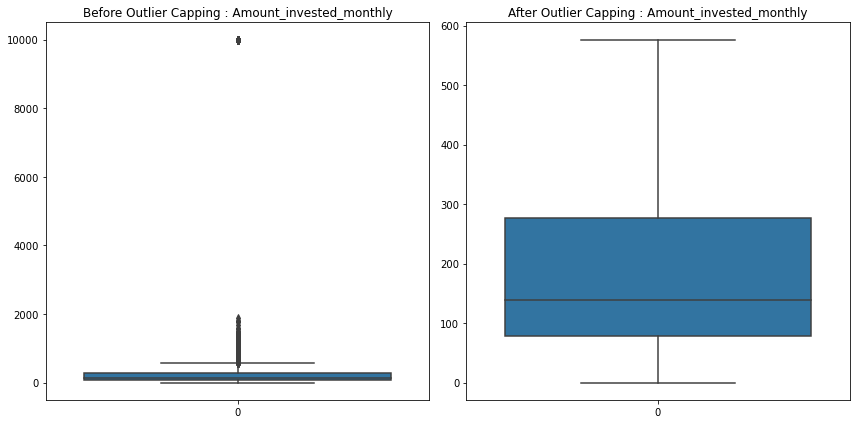

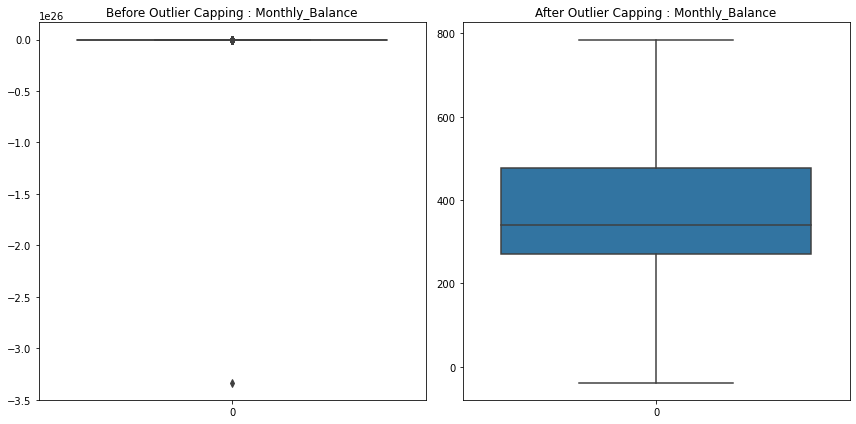

In [23]:
# comparing the columns with and without the outliers
def outlier_capping_comparison(data, data_processed, outlier_indices):
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            plt.figure(figsize=(12, 6))

            # plotting the numerical columns from the original dataframe
            plt.subplot(1, 2, 1)
            sns.boxplot(data=data[column])
            plt.title(f'Before Outlier Capping : {column}')

            # plot distribution of the numerical columns where outliers are capped
            plt.subplot(1, 2, 2)
            sns.boxplot(data=data_processed[column])
            plt.title(f'After Outlier Capping : {column}')

            # showing output
            plt.tight_layout()
            plt.show()

# running the function to compare the numerical columns before and after outlier capping
outlier_capping_comparison(data=df, data_processed=df_clean, outlier_indices=outliers)

In [24]:
# Remove outliers from the original dataframe based on the outlier indices
df_cleaned = df.drop(outliers)

# Reset index if needed
df_cleaned.reset_index(drop=True, inplace=True)

# Print the cleaned dataframe
print(df_cleaned)


          ID Customer_ID     Month             Name  Age          SSN  \
0     0x1602   CUS_0xd40   January    Aaron Maashoh   23  821-00-0265   
1     0x1603   CUS_0xd40  February    Aaron Maashoh   23  821-00-0265   
2     0x1605   CUS_0xd40     April    Aaron Maashoh   23  821-00-0265   
3     0x1606   CUS_0xd40       May    Aaron Maashoh   23  821-00-0265   
4     0x1607   CUS_0xd40      June    Aaron Maashoh   23  821-00-0265   
...      ...         ...       ...              ...  ...          ...   
5785  0x503c  CUS_0x29e9     March        Mutikaniv   39  499-31-6441   
5786  0x5046  CUS_0xa2b2   January  Pedro Nicolaciz   53  753-72-2651   
5787  0x5047  CUS_0xa2b2  February  Pedro Nicolaciz   53  753-72-2651   
5788  0x5048  CUS_0xa2b2     March  Pedro Nicolaciz   53  753-72-2651   
5789  0x504a  CUS_0xa2b2       May  Pedro Nicolaciz   53  753-72-2651   

     Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0     Scientist       19114.12            1824.

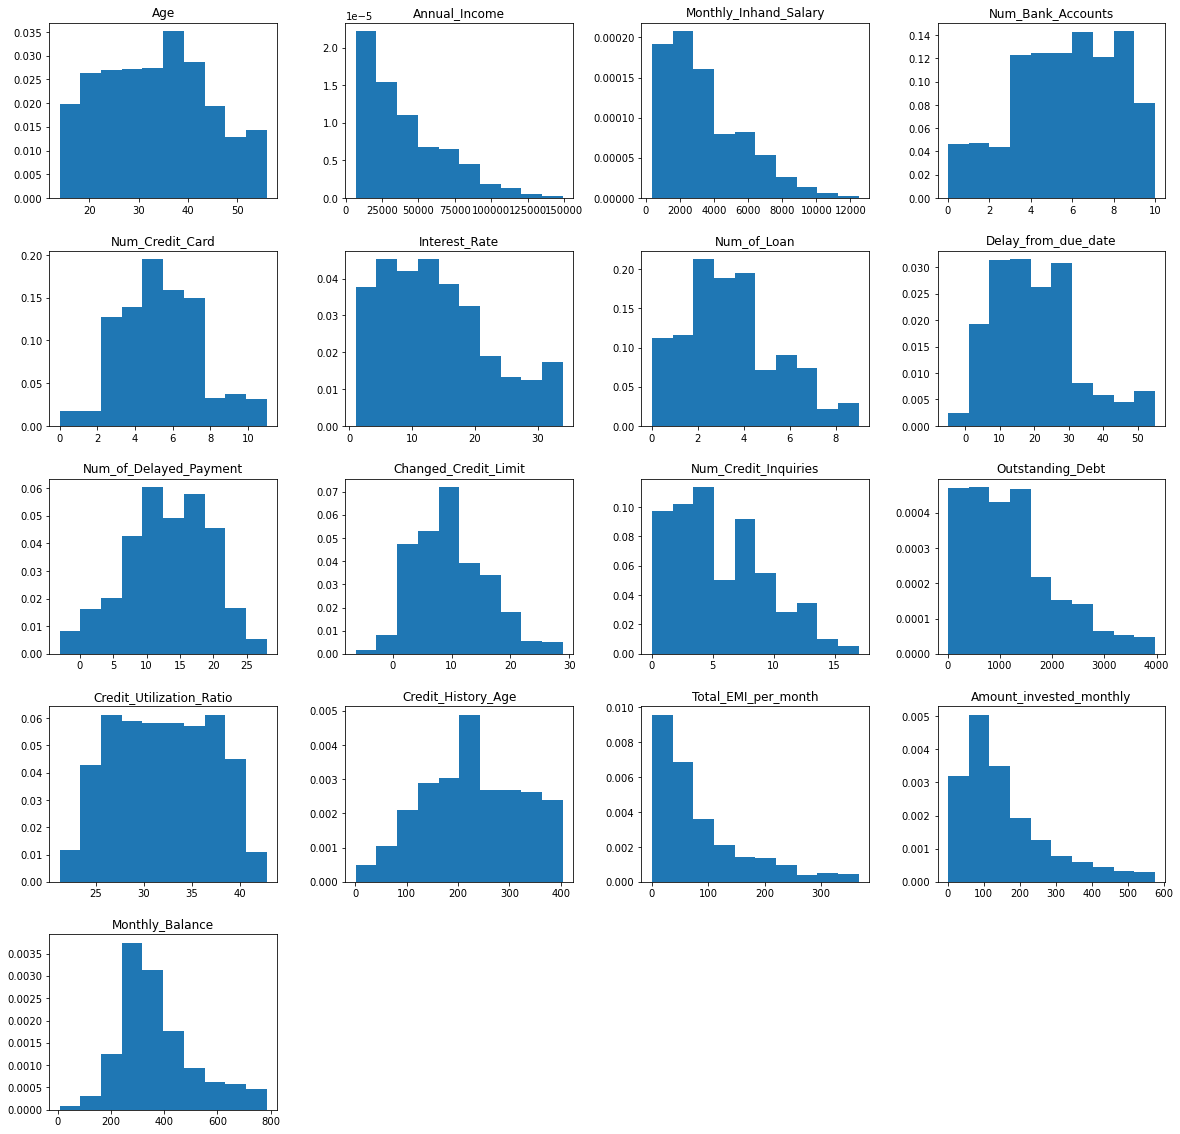

In [25]:
df_cleaned.hist(figsize=(20, 20), grid=False, density=True)
plt.show()

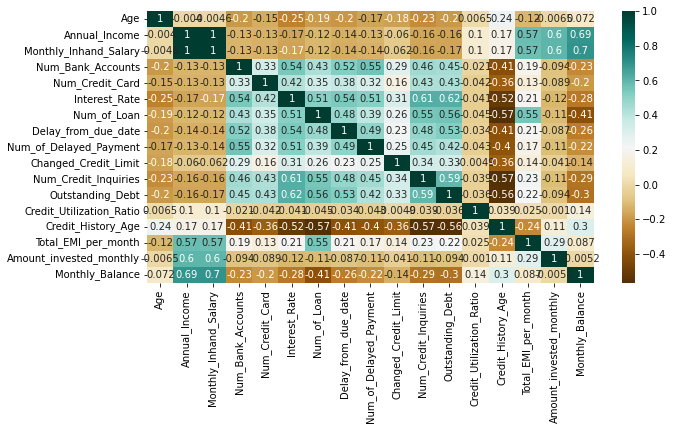

In [26]:
plt.figure(figsize=(10,5))
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, cmap="BrBG", annot=True)
plt.show()

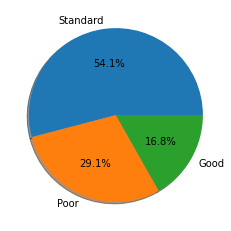

In [27]:
credit_socre_vals = df_cleaned.Credit_Score.value_counts().index
credit_socre_labels = df_cleaned.Credit_Score.value_counts().values

plt.pie(data = df_cleaned,
x = credit_socre_labels,
labels = credit_socre_vals,
autopct = '%1.1f%%',
shadow = True,
radius = 1)

plt.show()

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def create_stacked_bar_crosstab(data, cat_col1, cat_col2, rotation_val=0):
    # creating cross tab between two variables
    pd.crosstab(data[cat_col1], data[cat_col2]).plot(kind='bar', stacked=True)

    # adding title
    plt.title(f'{cat_col1} & {cat_col2} Distribution')

    # adding x and y label
    plt.xlabel(f'{cat_col1}')
    plt.ylabel('Number of Observations')

    # option for rotating xticks
    plt.xticks(rotation=rotation_val)

    plt.show()


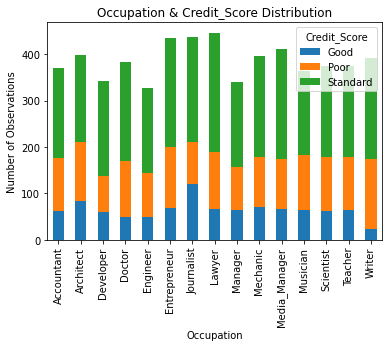

In [29]:
create_stacked_bar_crosstab(data = df_cleaned,
cat_col1 = 'Occupation',
cat_col2 = 'Credit_Score',
rotation_val = 90)

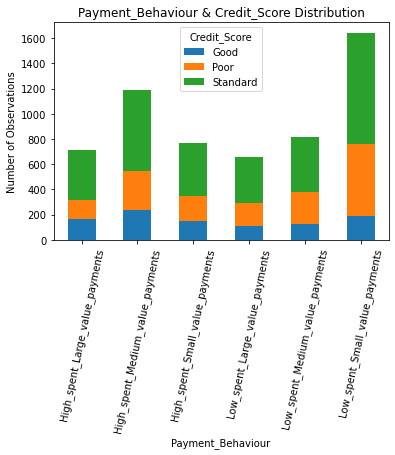

In [30]:
create_stacked_bar_crosstab(data = df_cleaned,
cat_col1 = 'Payment_Behaviour',
cat_col2 = 'Credit_Score',
rotation_val=78)

In [31]:
df_cleaned

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
3,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
4,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4.0,9.27,4.0,Good,809.98,27.262259,270.0,No,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5785,0x503c,CUS_0x29e9,March,Mutikaniv,39,499-31-6441,Teacher,56157.03,4790.752500,8,9,31,5,"Payday Loan, Not Specified, Home Equity Loan, ...",38,21.0,20.24,13.0,Bad,3403.79,31.127955,150.0,Yes,184.522838,110.040401,High_spent_Small_value_payments,444.512011,Poor
5786,0x5046,CUS_0xa2b2,January,Pedro Nicolaciz,53,753-72-2651,Manager,71305.22,5914.101667,8,4,18,0,Not Specified,12,18.0,8.49,3.0,Standard,1004.26,29.160753,274.0,No,0.000000,229.352570,High_spent_Medium_value_payments,612.057596,Standard
5787,0x5047,CUS_0xa2b2,February,Pedro Nicolaciz,53,753-72-2651,Manager,71305.22,5914.101667,8,4,18,0,Not Specified,12,15.0,8.49,3.0,Standard,1004.26,29.253660,274.0,NM,0.000000,125.046940,High_spent_Medium_value_payments,716.363227,Standard
5788,0x5048,CUS_0xa2b2,March,Pedro Nicolaciz,53,753-72-2651,Manager,71305.22,5914.101667,8,4,18,0,Not Specified,12,15.0,8.49,3.0,Standard,1004.26,34.216340,276.0,No,0.000000,140.578357,High_spent_Medium_value_payments,700.831810,Standard


In [32]:
unique_values = df_cleaned["Credit_Mix"].unique()

print("Unique values in the 'Category' column:")
print(unique_values)

Unique values in the 'Category' column:
['Good' 'Standard' 'Bad']


In [33]:
unique_values = df_cleaned["Credit_Score"].unique()

print("Unique values in the 'Category' column:")
print(unique_values)

Unique values in the 'Category' column:
['Good' 'Standard' 'Poor']


In [34]:
unique_values = df_cleaned["Payment_Behaviour"].unique()

print("Unique values in the 'Category' column:")
print(unique_values)

Unique values in the 'Category' column:
['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Small_value_payments' 'High_spent_Medium_value_payments'
 'High_spent_Large_value_payments' 'Low_spent_Medium_value_payments']


In [35]:
unique_values = df_cleaned["Type_of_Loan"].unique()

print("Unique values in the 'Category' column:")
print(unique_values)

Unique values in the 'Category' column:
['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Not Specified'
 'Not Specified, Auto Loan, and Student Loan'
 'Personal Loan, Debt Consolidation Loan, and Auto Loan'
 'Not Specified, and Payday Loan'
 'Credit-Builder Loan, Personal Loan, and Auto Loan'
 'Payday Loan, and Payday Loan'
 'Not Specified, Student Loan, and Personal Loan'
 'Personal Loan, Payday Loan, Student Loan, Auto Loan, Home Equity Loan, Student Loan, and Payday Loan'
 'Not Specified, Student Loan, Student Loan, Credit-Builder Loan, and Auto Loan'
 'Payday Loan, and Home Equity Loan'
 'Credit-Builder Loan, Not Specified, Mortgage Loan, Payday Loan, Credit-Builder Loan, and Personal Loan'
 'Mortgage Loan, Debt Consolidation Loan, Payday Loan, Auto Loan, and Not Specified'
 'Credit-Builder Loan, Mortgage Loan, Mortgage Loan, Credit-Builder Loan, and Student Loan'
 'Not Specified, Student Loan, and Student Loan'
 'Payday Loan, Not Speci

In [36]:
# finding the unique values
print('Unique values in Payment_of_Min_Amount are: ', df_cleaned['Payment_of_Min_Amount'].unique())

Unique values in Payment_of_Min_Amount are:  ['No' 'NM' 'Yes']


In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_cleaned['Type_of_Loan'] = label_encoder.fit_transform(df_cleaned['Type_of_Loan'])

In [38]:
# setting values
target_mapping = {'No': 1, 'NM': 2, 'Yes': 3}

# mapping values
df_cleaned['Payment_of_Min_Amount'] = df_cleaned['Payment_of_Min_Amount'].map(target_mapping)

In [39]:
# mentioning the categorical columns where one-hot encoding needs to be performed
columns_to_encode = ['Occupation', 'Credit_Mix', 'Payment_Behaviour']

# creating dummy variables
df_dummy = pd.get_dummies(df_cleaned[columns_to_encode])

# concatenating the dummy variables with the original dataframe
df_processed = pd.concat([df_cleaned, df_dummy], axis=1)

# dropping the original categorical columns for which dummy variables were created
df_processed.drop(columns_to_encode, axis=1, inplace=True)

In [40]:
target_mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}
df_processed['Credit_Score'] = df_processed['Credit_Score'].map(target_mapping)

In [41]:
df_processed.drop(['ID', 'Customer_ID', 'SSN', 'Name'], axis=1, inplace=True)
df_processed.head()


,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,January,23,19114.12,1824.843333,3,4,3,4,19,3,7.0,11.27,4.0,809.98,26.822620,265.0,1,49.574949,80.415295,312.494089,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,February,23,19114.12,1824.843333,3,4,3,4,19,-1,4.0,11.27,4.0,809.98,31.944960,265.0,1,49.574949,118.280222,284.629163,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,April,23,19114.12,1824.843333,3,4,3,4,19,5,4.0,6.27,4.0,809.98,31.377862,268.0,1,49.574949,199.458074,223.451310,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,May,23,19114.12,1824.843333,3,4,3,4,19,6,4.0,11.27,4.0,809.98,24.797347,269.0,1,49.574949,41.420153,341.489231,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,June,23,19114.12,1824.843333,3,4,3,4,19,8,4.0,9.27,4.0,809.98,27.262259,270.0,1,49.574949,62.430172,340.479212,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0


In [42]:
df_processed.corr(method='pearson')

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
Age,1.000000,-0.003956,-0.004581,-0.195118,-0.145994,-0.249981,-0.191403,-0.001854,-0.203550,-0.165824,-0.178949,-0.225923,-0.197597,0.006503,0.243646,-0.251642,-0.121594,-0.006530,0.072045,0.179480,-0.012469,0.007031,0.012362,0.002630,-0.066165,0.025606,0.052581,0.014880,-0.008866,-0.013218,-0.007576,0.005466,0.002078,-0.043980,0.018859,-0.208974,0.258878,-0.076164,-0.004334,-0.002591,0.018877,-0.017145,0.003963,0.000297
Annual_Income,-0.003956,1.000000,0.997048,-0.128946,-0.132019,-0.166883,-0.120063,0.045186,-0.143560,-0.130116,-0.060367,-0.161375,-0.164164,0.102425,0.172433,-0.155849,0.572966,0.598427,0.691701,0.131305,-0.029386,-0.021948,-0.059527,0.039791,0.010981,0.021517,-0.029096,-0.024631,0.060807,0.028914,-0.023947,0.029676,0.012916,-0.003295,-0.008308,-0.118151,0.143963,-0.040876,0.175446,0.181840,0.029904,-0.035096,0.018380,-0.302749
Monthly_Inhand_Salary,-0.004581,0.997048,1.000000,-0.129796,-0.133468,-0.169374,-0.121690,0.037909,-0.144161,-0.135119,-0.062463,-0.162511,-0.166468,0.102891,0.171877,-0.157732,0.568651,0.601803,0.695111,0.130551,-0.031609,-0.023720,-0.056803,0.038779,0.012709,0.022569,-0.028988,-0.025056,0.060349,0.033541,-0.019797,0.027887,0.013275,-0.002670,-0.015988,-0.119340,0.145687,-0.041537,0.176010,0.181603,0.032002,-0.034502,0.017786,-0.304488
Num_Bank_Accounts,-0.195118,-0.128946,-0.129796,1.000000,0.331482,0.542203,0.433327,-0.064255,0.518095,0.553993,0.286278,0.460794,0.445660,-0.020802,-0.413571,0.489834,0.191689,-0.094048,-0.232940,-0.356674,-0.041303,0.028735,-0.005898,0.014773,0.039894,0.030024,-0.021574,-0.046230,-0.008016,0.030726,-0.003507,-0.002486,-0.041976,-0.018130,0.047270,0.468237,-0.611504,0.199262,-0.003441,-0.020873,-0.045008,0.011960,-0.003212,0.049146
Num_Credit_Card,-0.145994,-0.132019,-0.133468,0.331482,1.000000,0.418772,0.348361,-0.014244,0.378861,0.320663,0.158242,0.425138,0.431449,-0.042253,-0.358678,0.298658,0.128460,-0.088767,-0.197540,-0.386111,0.041787,0.017616,-0.005001,0.018953,-0.026367,0.011110,-0.031396,-0.032253,-0.012153,0.007554,0.019482,-0.021366,-0.011030,-0.026101,0.048325,0.431907,-0.303504,-0.053191,-0.018822,-0.022768,-0.016855,0.003190,-0.018737,0.059020
Interest_Rate,-0.249981,-0.166883,-0.169374,0.542203,0.418772,1.000000,0.513162,-0.030228,0.536439,0.514690,0.312770,0.614662,0.619282,-0.040725,-0.516309,0.553580,0.207105,-0.119699,-0.276444,-0.498659,0.018007,-0.018719,-0.029025,0.014374,0.032873,-0.029994,-0.041591,-0.002463,-0.011019,0.013136,0.007506,0.011419,-0.043624,0.035949,0.047910,0.567536,-0.588128,0.102303,-0.025451,-0.024016,-0.043208,-0.008656,-0.009117,0.085730
Num_of_Loan,-0.191403,-0.120063,-0.121690,0.433327,0.348361,0.513162,1.000000,-0.015622,0.476669,0.392601,0.257321,0.548340,0.556537,-0.045355,-0.565902,0.418846,0.552846,-0.110299,-0.409537,-0.349113,0.019679,-0.033764,0.024130,0.026585,0.040130,0.026770,-0.064270,-0.021319,-0.012083,-0.000754,0.013968,0.013410,-0.001489,-0.024864,0.001645,0.563484,-0.363369,-0.099041,0.005964,-0

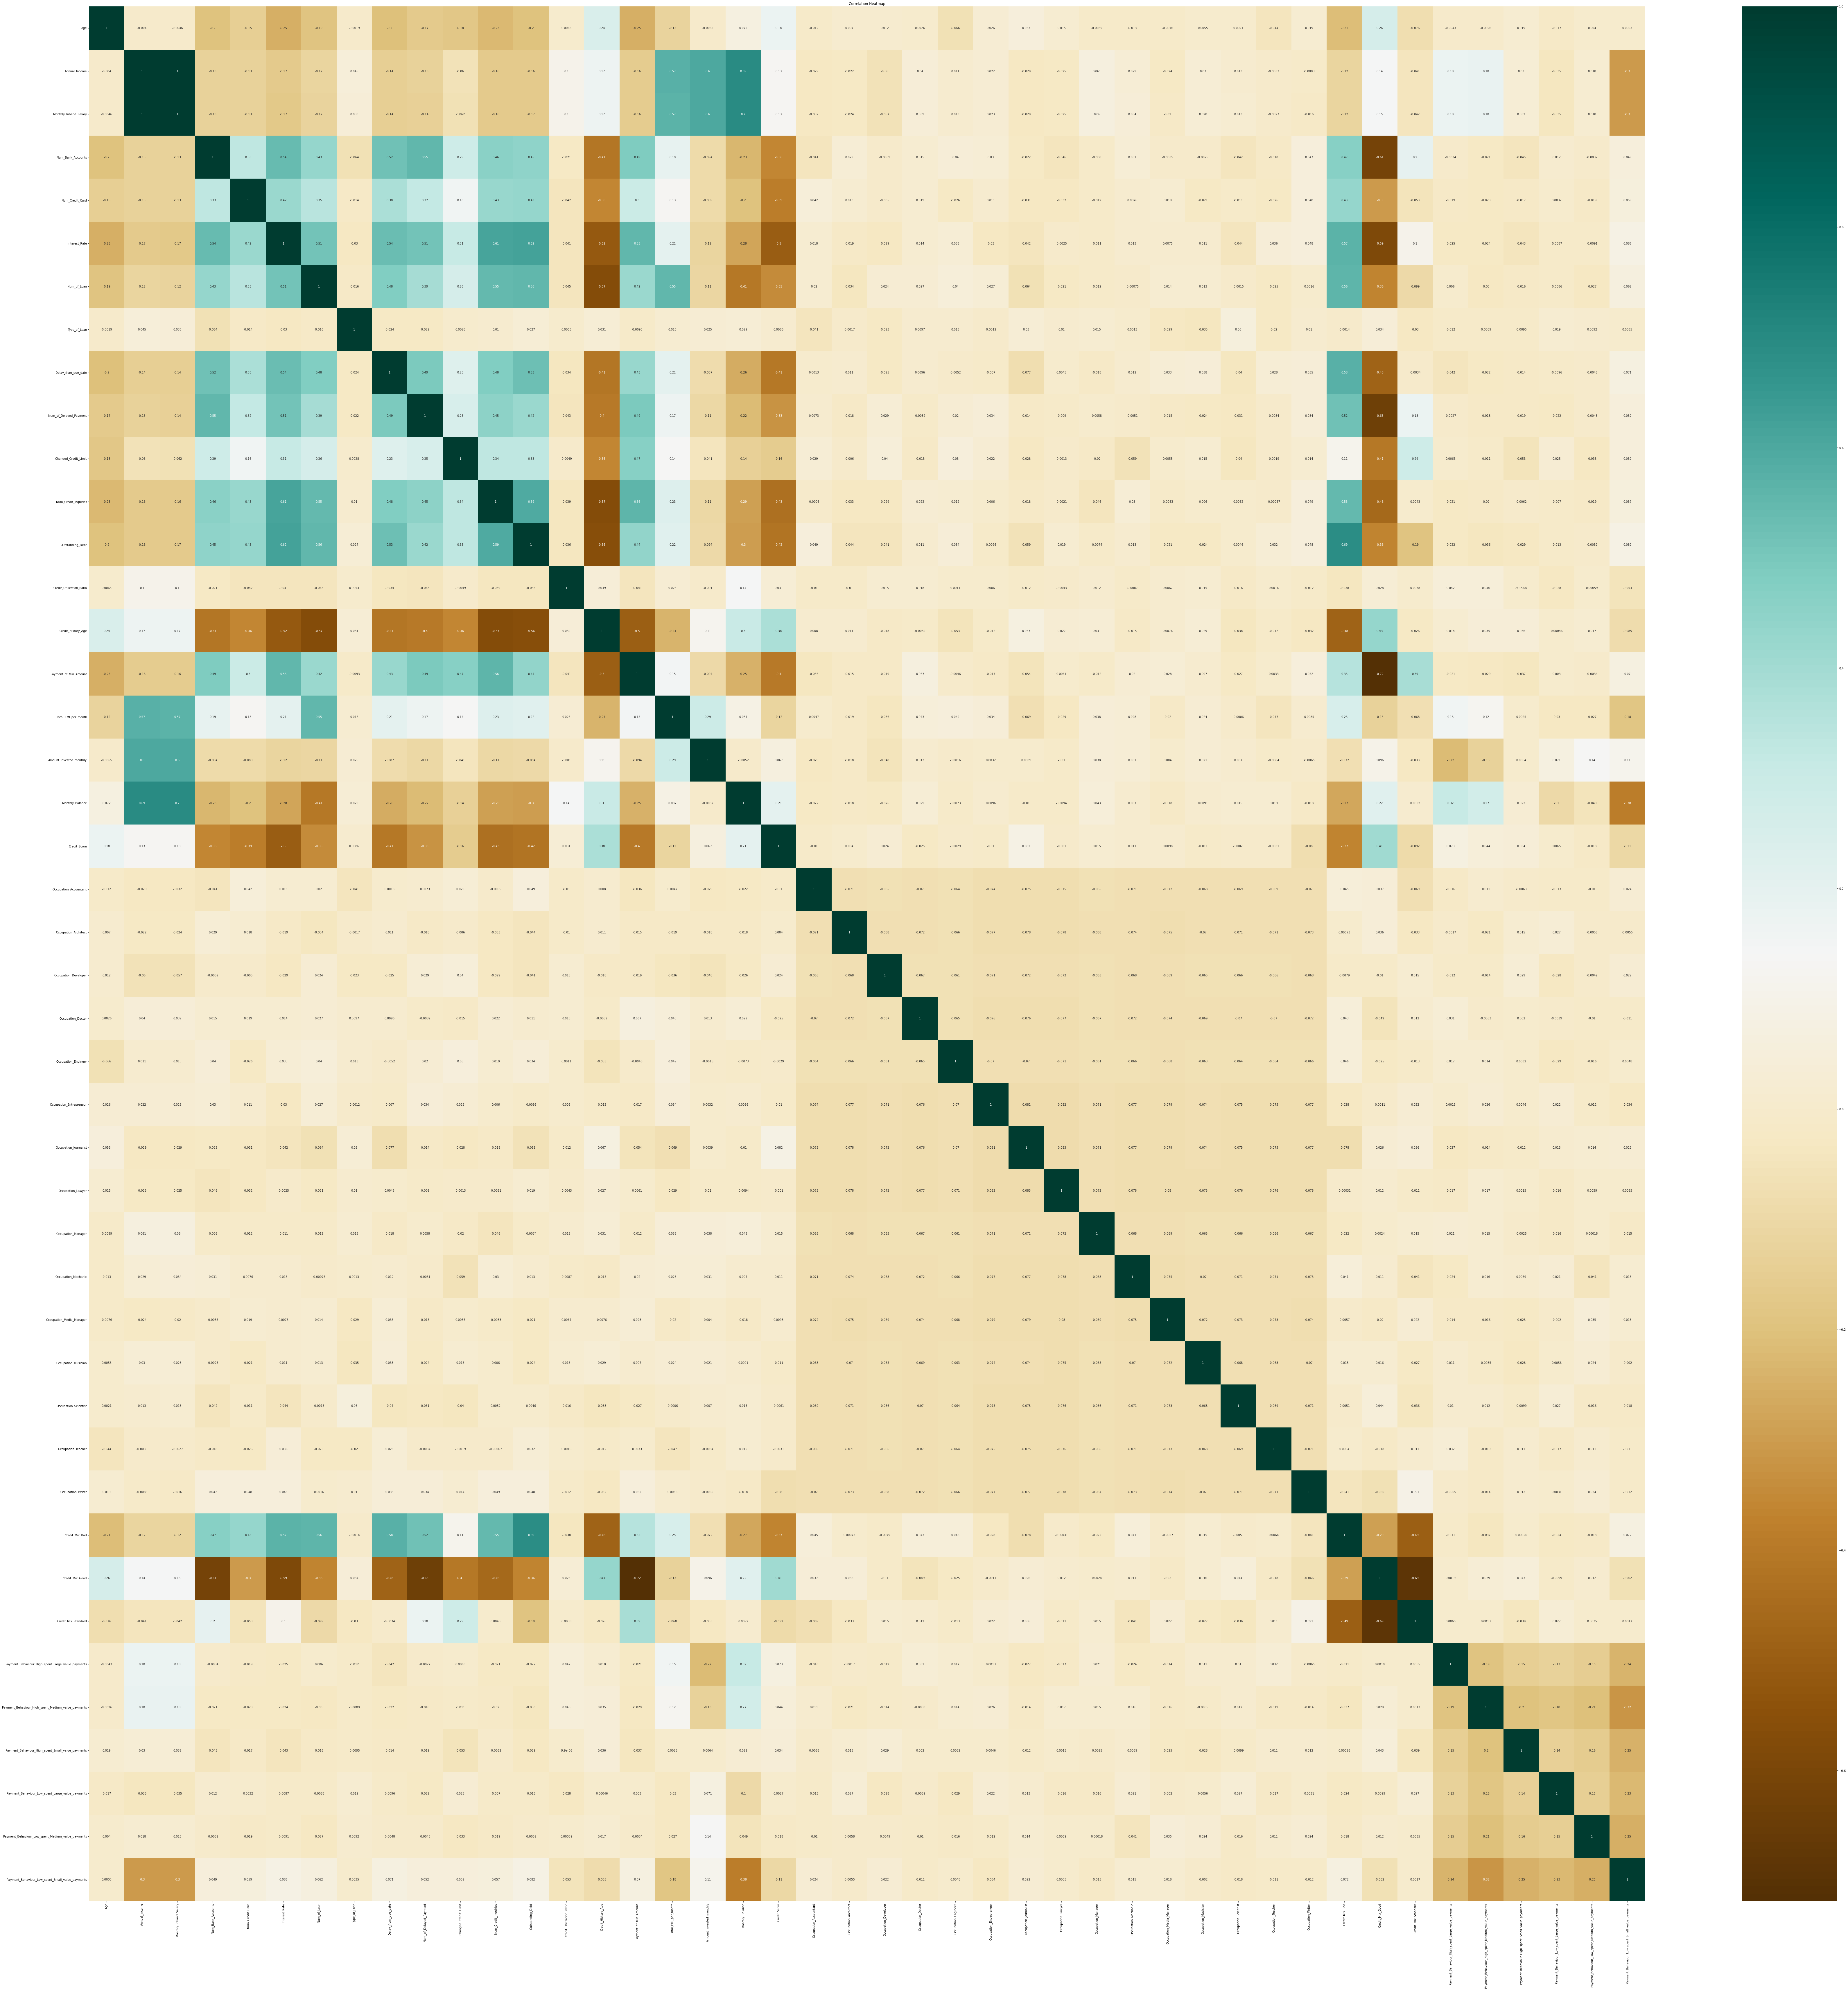

In [43]:
# Calculate correlation matrix
correlation_matrix = df_processed.corr()
# Heatmap of the correlation matrix
plt.figure(figsize=(120,120))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG')
plt.title('Correlation Heatmap')
plt.show()

In [44]:
sorted_corr_msrp = correlation_matrix['Credit_Score'].sort_values(ascending=False)
sorted_corr_msrp


Credit_Score                                          1.000000
Credit_Mix_Good                                       0.408828
Credit_History_Age                                    0.378797
Monthly_Balance                                       0.207125
Age                                                   0.179480
Annual_Income                                         0.131305
Monthly_Inhand_Salary                                 0.130551
Occupation_Journalist                                 0.082233
Payment_Behaviour_High_spent_Large_value_payments     0.073141
Amount_invested_monthly                               0.066564
Payment_Behaviour_High_spent_Medium_value_payments    0.043961
Payment_Behaviour_High_spent_Small_value_payments     0.034135
Credit_Utilization_Ratio                              0.031032
Occupation_Developer                                  0.024414
Occupation_Manager                                    0.015289
Occupation_Mechanic                                   0

In [45]:
# Select only nume                                
x=df_processed[["Interest_Rate","Num_Credit_Inquiries","Credit_Mix_Good","Delay_from_due_date","Outstanding_Debt","Payment_of_Min_Amount","Num_Credit_Card","Credit_History_Age"]]
x

,Interest_Rate,Num_Credit_Inquiries,Credit_Mix_Good,Delay_from_due_date,Outstanding_Debt,Payment_of_Min_Amount,Num_Credit_Card,Credit_History_Age
0,3,4.0,1,3,809.98,1,4,265.0
1,3,4.0,1,-1,809.98,1,4,265.0
2,3,4.0,1,5,809.98,1,4,268.0
3,3,4.0,1,6,809.98,1,4,269.0
4,3,4.0,1,8,809.98,1,4,270.0
...,...,...,...,...,...,...,...,...
5785,31,13.0,0,38,3403.79,3,9,150.0
5786,18,3.0,0,12,1004.26,1,4,274.0
5787,18,3.0,0,12,1004.26,2,4,274.0
5788,18,3.0,0,12,1004.26,1,4,276.0


In [46]:
# Select only numeric type of columns by their names as:
y = df_processed[['Credit_Score']]
y

,Credit_Score
0,3
1,3
2,3
3,3
4,3
...,...
5785,1
5786,2
5787,2
5788,2


In [47]:
from sklearn.model_selection import train_test_split
 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (4632, 8)
X_test: (1158, 8)


In [48]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Decision Tree classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data
model.fit(X_train, y_train)


C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [49]:
# Make predictions on the test data
y4_pred = model.predict(X_test)


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Evaluate the model
accuracy = accuracy_score(y_test, y4_pred)
confusion = confusion_matrix(y_test, y4_pred)
report = classification_report(y_test, y4_pred)
# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)


Accuracy: 0.82
Confusion Matrix:
[[265  55   1]
 [ 69 514  48]
 [  3  36 167]]
Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.83      0.81       321
           2       0.85      0.81      0.83       631
           3       0.77      0.81      0.79       206

    accuracy                           0.82      1158
   macro avg       0.80      0.82      0.81      1158
weighted avg       0.82      0.82      0.82      1158



In [51]:
x.tail()

,Interest_Rate,Num_Credit_Inquiries,Credit_Mix_Good,Delay_from_due_date,Outstanding_Debt,Payment_of_Min_Amount,Num_Credit_Card,Credit_History_Age
5785,31,13.0,0,38,3403.79,3,9,150.0
5786,18,3.0,0,12,1004.26,1,4,274.0
5787,18,3.0,0,12,1004.26,2,4,274.0
5788,18,3.0,0,12,1004.26,1,4,276.0
5789,18,5.0,0,11,1004.26,1,4,278.0


In [52]:
y.tail()

,Credit_Score
5785,1
5786,2
5787,2
5788,2
5789,1


In [55]:
# # Make predictions on the New data
Interest_Rate=18
Num_Credit_Inquiries=3.0
Credit_Mix_Good=0
Delay_from_due_date=12
Outstanding_Debt=1004.276
Payment_of_Min_Amount=1
Num_Credit_Card=4
Credit_History_Age=274.0
y4_pred = model.predict([[Interest_Rate,Num_Credit_Inquiries,Credit_Mix_Good,Delay_from_due_date,Outstanding_Debt,Payment_of_Min_Amount,Num_Credit_Card,Credit_History_Age]])
print(f"Predicted Value: {round(y4_pred[0])}")

Predicted Value: 2


C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [54]:
# save the model
import pickle
pickle.dump(model, open("Score_Insight_RanFor.pkl", "wb"))

In [56]:

# Make predictions on the New data

Interest_Rate=18
Num_Credit_Inquiries=3.0
Credit_Mix_Good=0
Delay_from_due_date=12
Outstanding_Debt=1004.276
Payment_of_Min_Amount=1
Num_Credit_Card=4
Credit_History_Age=274.0
y4_pred = model.predict([[Interest_Rate,Num_Credit_Inquiries,Credit_Mix_Good,Delay_from_due_date,Outstanding_Debt,Payment_of_Min_Amount,Num_Credit_Card,Credit_History_Age]])
print(f"Predicted Value: {round(y4_pred[0])}")


Predicted Value: 2


C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
